In [1]:
# if you installed the nico package then uncomment and load the respective modules 

#from nico import Annotations as sann
#from nico import Interactions as sint
#from nico import Covariations as scov

import Annotations as sann
import Interactions as sint
import Covariations as scov

#import scanpy as sc
#import gseapy
#import xlsxwriter

#import numpy as np
#import time
#import os

import matplotlib


In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.linewidth'] = 0.1 #set the value globally

import matplotlib.pyplot as plt
plt.rc('font', family='Helvetica')

In [3]:
ref_datapath='./inputRef/'
query_datapath='./inputQuery/'
output_annotation_folder=None
output_nico_dir=None


# Perform cell type annotation of spatial data 

In [4]:
anchors_and_neighbors_info=sann.find_anchor_cells_between_ref_and_query(refpath=ref_datapath,quepath=query_datapath,
            outputFolder=output_annotation_folder)


In [5]:
output_info=sann.nico_based_annotation(anchors_and_neighbors_info,
guiding_spatial_cluster_resolution_tag='leiden0.4',
across_spatial_clusters_dispersion_cutoff=0.15,
resolved_tie_issue_with_weighted_nearest_neighbor='No')

In [6]:
#sann.delete_files(output_info)

In [7]:
# Visualize the anchor cells between two modalities. 
# sann.visualize_spatial_anchored_cell_mapped_to_scRNAseq(output_info)

The figures are saved:  ./inputQuery/MNN_based_annotations/tissue_and_umap_with_all_celltype_annotations.png


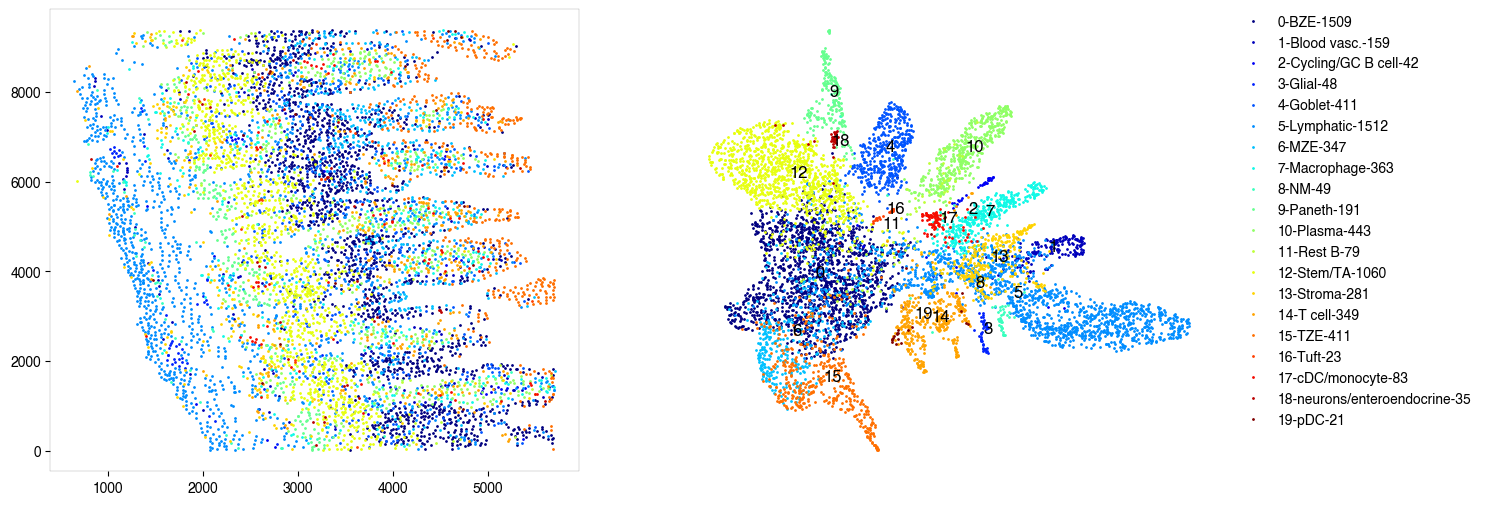

In [8]:
sann.visualize_umap_and_cell_coordinates_with_all_celltypes(saveas='png',
outputFolder=output_annotation_folder)

The figures are saved:  ./inputQuery/MNN_based_annotations/fig_individual_annotation/Stem_TA0.png
The figures are saved:  ./inputQuery/MNN_based_annotations/fig_individual_annotation/Paneth1.png


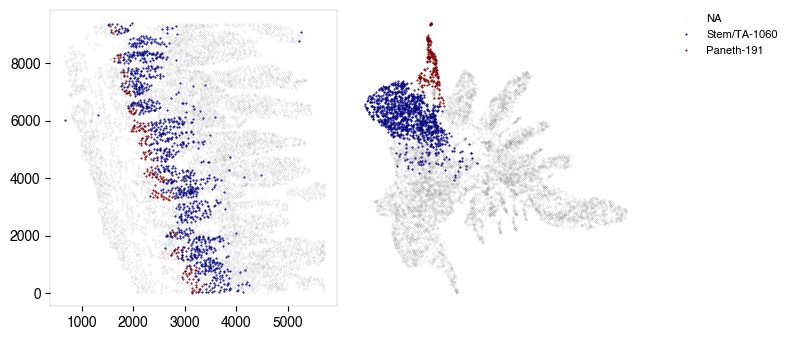

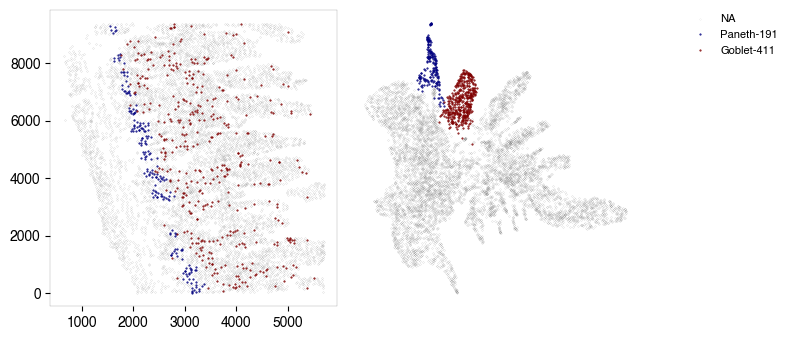

In [9]:
choose_celltypes=[['Stem/TA','Paneth'],['Paneth','Goblet']]
sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(choose_celltypes=choose_celltypes,
                        saveas='png',outputFolder=output_annotation_folder)

In [10]:
# For visualizing every cell type individually, leave list choose_celltypes list empty.  
#sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(choose_celltypes=[])

# Infer significant niche cell type interactions 

In [11]:
# If user define the output annotation folder path then use this command 
#clusterFilename=output_annotation_folder+'3_nico_annotation_cluster.csv'
#celltypeFilename=output_annotation_folder+'3_nico_annotation_ct_name.csv'

In [12]:
# If not which is by default use output_annotation_folder=None then use following command 
clusterFilename=None
celltypeFilename=None

In [13]:
niche_pred_output=sint.spatial_neighborhood_analysis(Radius=0,
clusterFilename=clusterFilename,
quepath=query_datapath, 
celltypeFilename=celltypeFilename,
outputdir=output_nico_dir,
removed_CTs_before_finding_CT_CT_interactions=['NM','Basophils','Cycling/GC B cell','pDC'])

average neighbors: 4.8332420591456735
data shape (7272, 19) (7272,) neighbor shape (7272, 17)
Searching hyperparameters  Grid method: 0.001953125
Searching hyperparameters  Grid method: 0.001953125
Inverse of lambda regularization found 0.001953125
training (5818, 17) testing (1454, 17) coeff (17, 17)


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/TopCoeff_R0/Rank1_Paneth.png
The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/TopCoeff_R0/Rank4_Stem_TA.png


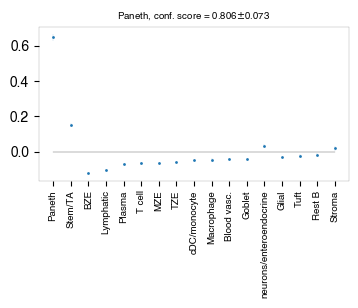

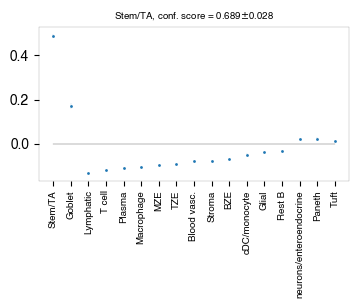

In [14]:
sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=['Stem/TA','Paneth'],
saveas='png')

In [15]:
#sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=[])

In [16]:
# Plot the ROC curve of the classifier prediction for one of the crossfolds. 
# sint.plot_roc_results(niche_pred_output)

The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/Confusing_matrix_R0.png


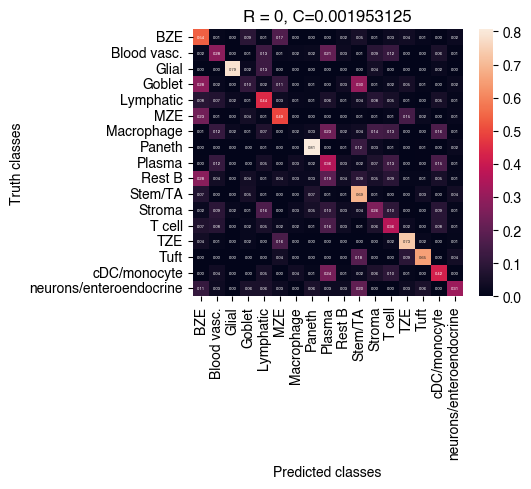

In [17]:
sint.plot_confusion_matrix(niche_pred_output,saveas='png')

The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/weight_matrix_R0.png


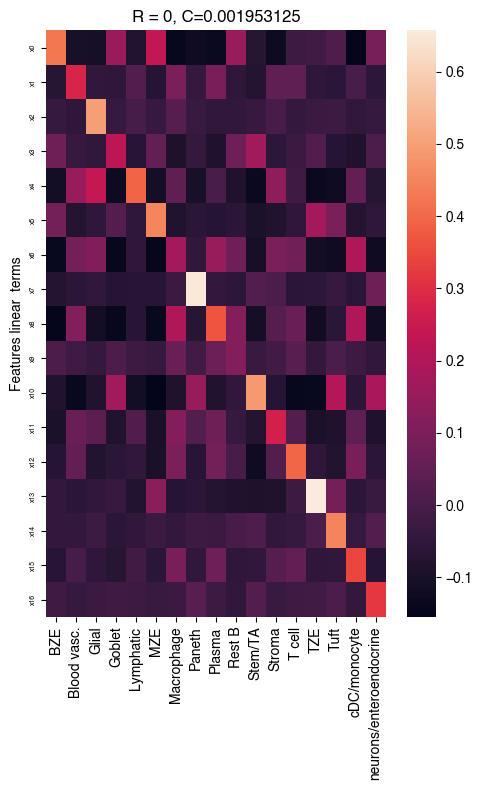

In [18]:
sint.plot_coefficient_matrix(niche_pred_output,saveas='png')

The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/scores_0.png


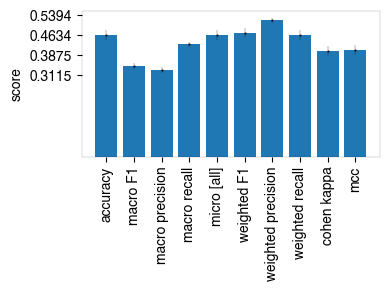

In [19]:
sint.plot_evaluation_scores(niche_pred_output, figsize=(4,3),saveas='png')

The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/Niche_interactions_without_edge_weights_R0.png


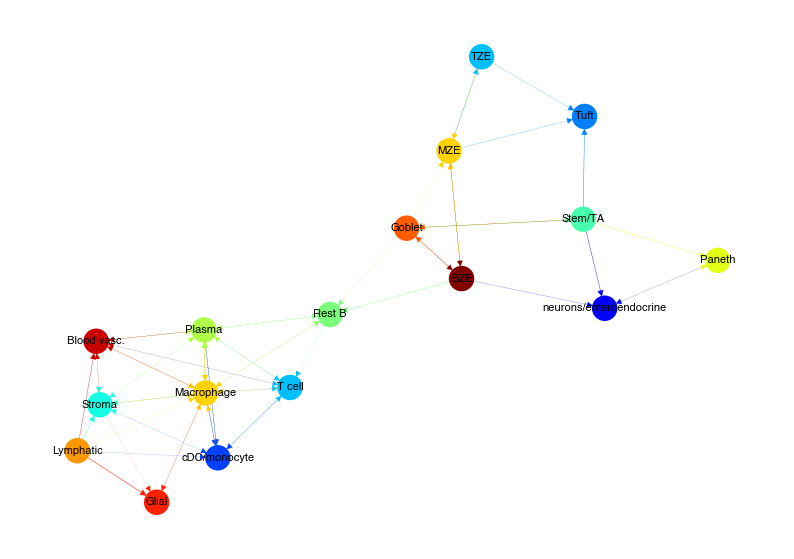

In [20]:
# Plot the niche interaction network without any edge weight details for cutoff 0.04 
sint.plot_niche_interactions_without_edge_weight(niche_pred_output,niche_cutoff=0.04, saveas='png')

The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/Niche_interactions_with_edge_weights_R0.png


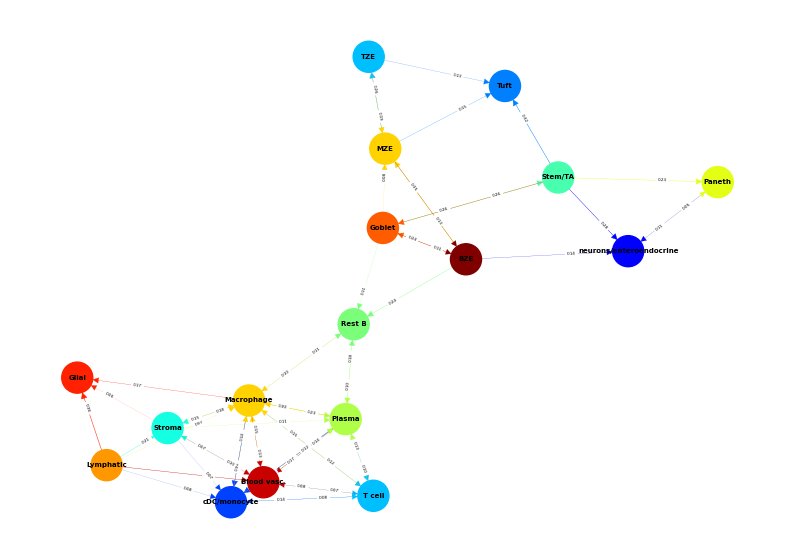

In [21]:
# Plot the niche interaction network with edge weight details for cutoff 0.05
sint.plot_niche_interactions_with_edge_weight(niche_pred_output,niche_cutoff=0.05,saveas='png')

# Perform niche cell state covariation analysis using latent factors

In [22]:
all_output_data=scov.gene_covariation_analysis(iNMFmode=True,
        Radius=0,
        no_of_factors=3,
        refpath=ref_datapath,
        quepath=query_datapath,
        niche_prediction_dir=output_nico_dir,
        ref_cluster_tag='cluster') #LRdbFilename='NiCoLRdb.txt'



 Spatial and scRNA-seq number of clusters, respectively  17 19
Common cell types between spatial and scRNA-seq data   17 {'cDC/monocyte', 'Goblet', 'BZE', 'T cell', 'Blood vasc.', 'Glial', 'Stem/TA', 'neurons/enteroendocrine', 'Rest B', 'Paneth', 'Stroma', 'MZE', 'Tuft', 'Plasma', 'TZE', 'Macrophage', 'Lymphatic'}

The spatial cluster name does not match the scRNA-seq cluster name  set()
If the above answer is Null, then everything is okay. However, if any spatial cell type does not exist in the scRNA-seq data, please correct this manually; otherwise, NiCo will not run. 





cell types found  ['Paneth']
The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/NMF_output/Paneth.png


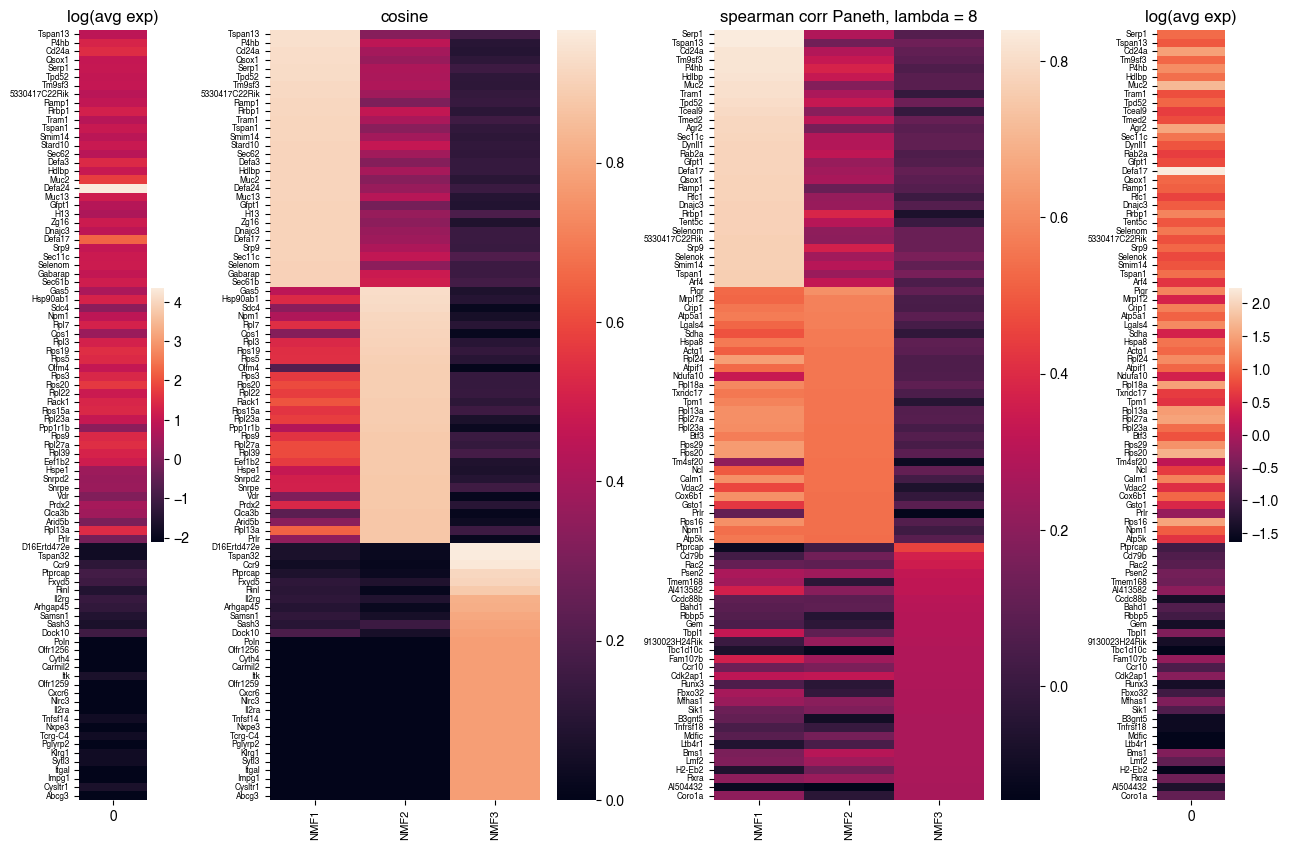

In [23]:
scov.plot_cosine_and_spearman_correlation_to_factors(all_output_data,choose_celltypes=['Paneth'],
                    NOG_Fa=30,saveas='png')

The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/dotplots/Factors_Stem_TA.png


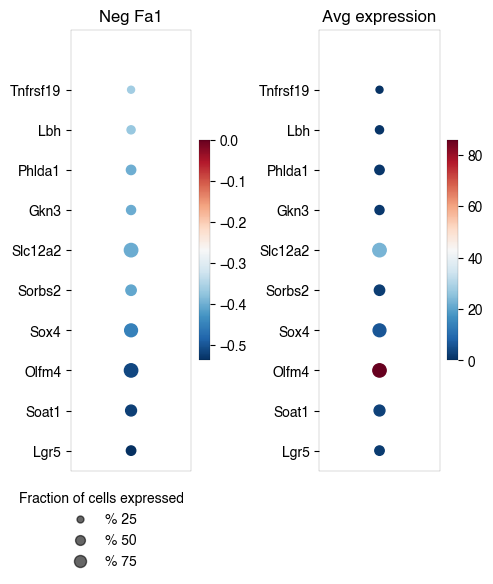

In [24]:
dataFrame=scov.extract_and_plot_top_genes_from_chosen_factor_in_celltype(all_output_data,choose_celltype='Stem/TA',
choose_factor_id=1,top_NOG=10,correlation_with_spearman=True,saveas='png',positively_correlated=False)

In [25]:
dataFrame

Gene        Fa  mean_expression  proportion_of_population_expressed
0      Lgr5 -0.538455         1.985714                            0.459524
1     Soat1 -0.522171         2.752381                            0.611905
2     Olfm4 -0.514318        85.804764                            0.921429
3      Sox4 -0.450677         6.140476                            0.847619
4    Sorbs2 -0.409824         2.016667                            0.554762
5   Slc12a2 -0.402542        22.964285                            0.930952
6      Gkn3 -0.402430         1.452381                            0.423810
7    Phlda1 -0.400896         1.309524                            0.452381
8       Lbh -0.370594         0.680952                            0.338095
9  Tnfrsf19 -0.362783         0.402381                            0.252381

In [26]:
scov.make_excel_sheet_for_gene_correlation(all_output_data)

cell types found  ['Stem/TA']
The regression figures as pvalue circle plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


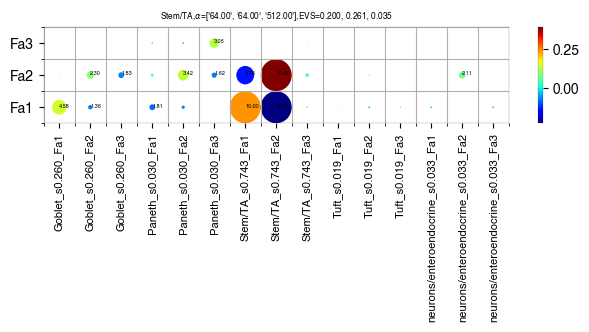

In [27]:
choose_celltypes=['Stem/TA']
scov.plot_significant_regression_covariations_as_circleplot(all_output_data,
    choose_celltypes=choose_celltypes, saveas='png')


cell types found  ['Stem/TA']
The regression figures as pvalue circle plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


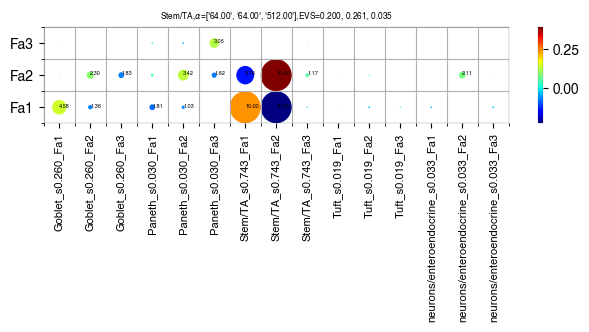

In [28]:
choose_celltypes=['Stem/TA']
scov.plot_significant_regression_covariations_as_circleplot(all_output_data,
            choose_celltypes=choose_celltypes,pvalue_cutoff=0.1,mention_pvalue=True,saveas='png')


cell types found  ['Stem/TA']
The regression figures as pvalue circle plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


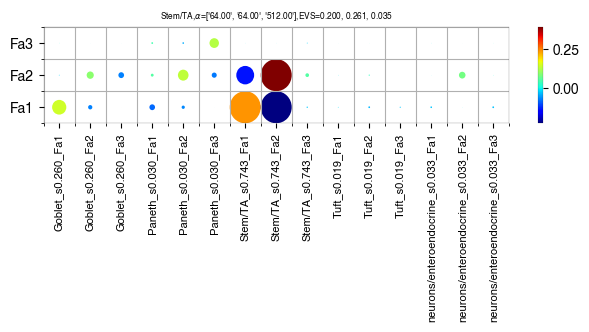

In [29]:
choose_celltypes=['Stem/TA']
scov.plot_significant_regression_covariations_as_circleplot(all_output_data,
            choose_celltypes=choose_celltypes,pvalue_cutoff=0.05,mention_pvalue=False,saveas='png')

cell types found  ['Stem/TA']
The regression figures as pvalue heatmap plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_heatmap_*


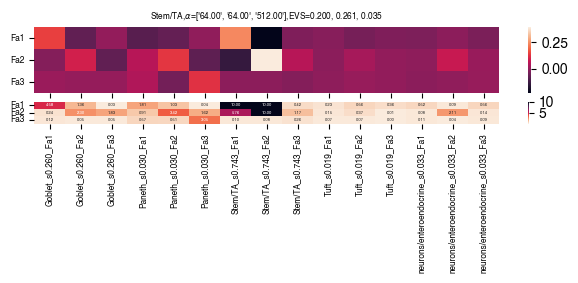

In [30]:
scov.plot_significant_regression_covariations_as_heatmap(all_output_data,
    choose_celltypes=['Stem/TA'],saveas='png',transparent_mode='False',figsize=(6,1.25))


In [31]:
scov.save_LR_interactions_in_excelsheet_and_regression_summary_in_textfile_for_interacting_cell_types(all_output_data,
pvalueCutoff=0.05,correlation_with_spearman=True,
LR_plot_NMF_Fa_thres=0.2,LR_plot_Exp_thres=0.2,number_of_top_genes_to_print=5)


The Excel sheet is saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/Lig_and_Rec_enrichment_in_interacting_celltypes.xlsx
The text file is saved: ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_summary.txt


# Generate visualizations of ligand-receptor interactions within the niche

LR figures for both ways are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche/
LR figures for CC to NC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche_cc_vs_nc/
LR figures for NC to CC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche_nc_vs_cc/


0

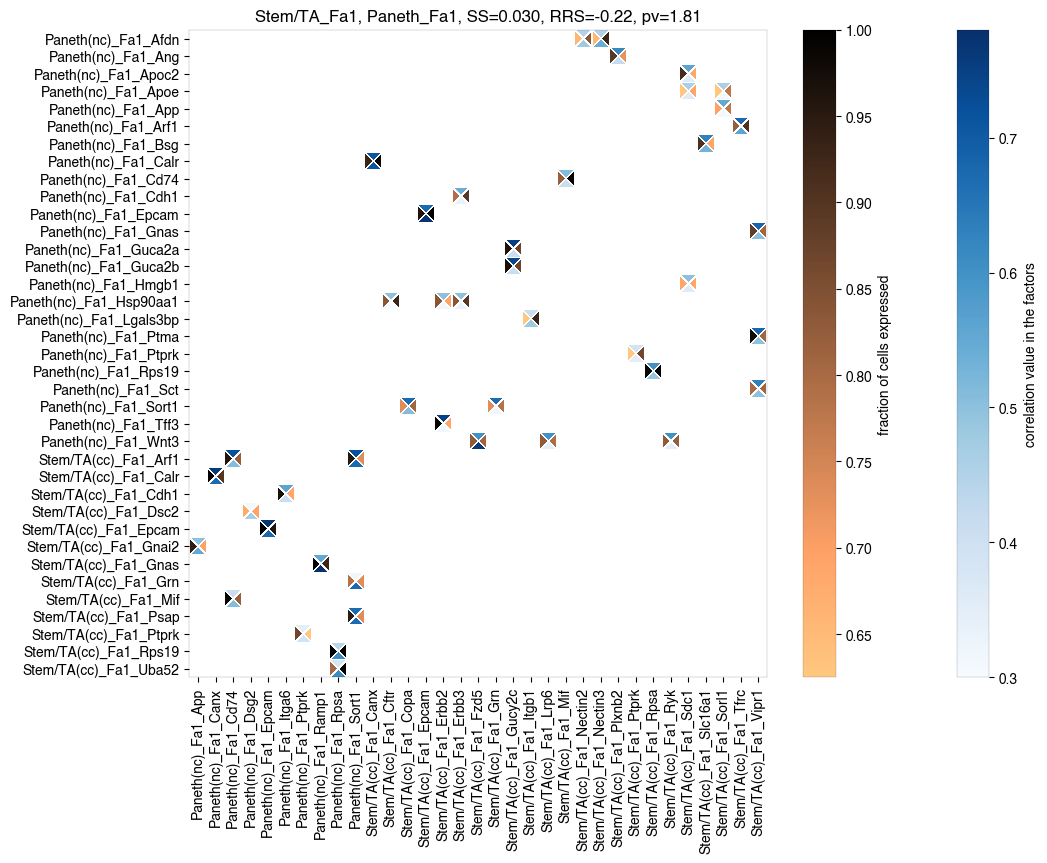

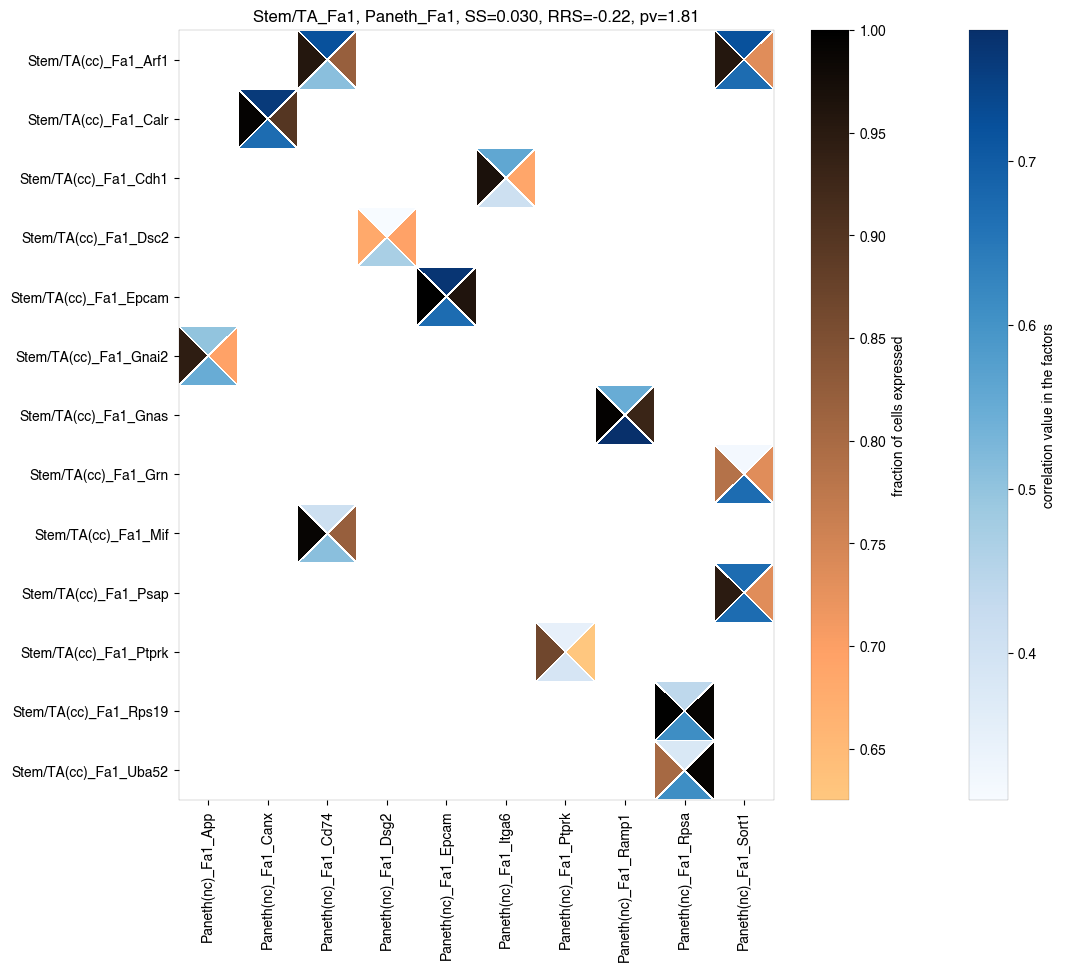

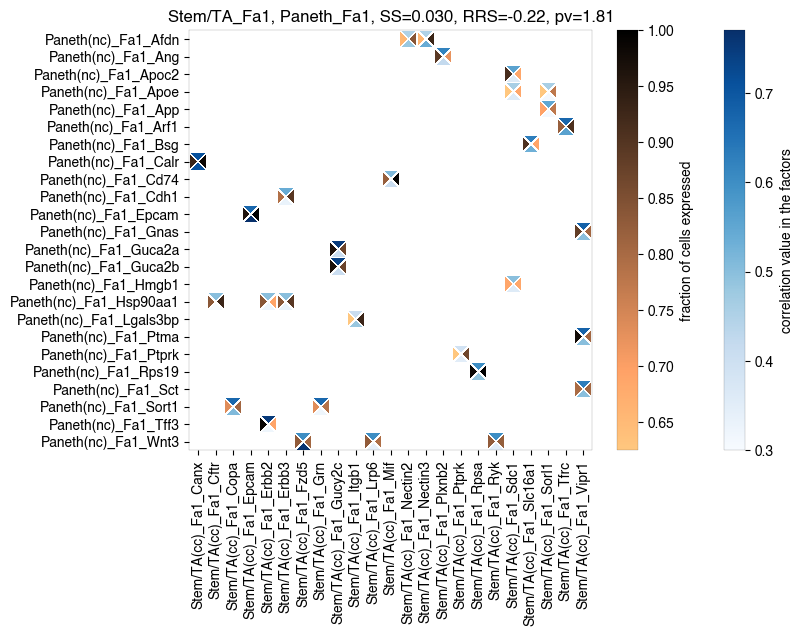

In [32]:
choose_celltypes=['Stem/TA']
scov.find_LR_interactions_in_interacting_cell_types(all_output_data,
choose_interacting_celltype_pair=['Stem/TA','Paneth'],saveas='png',choose_factors_id=[1,1],pvalueCutoff=0.05,
    LR_plot_NMF_Fa_thres=0.3,LR_plot_Exp_thres=0.6)

In [33]:
#scov.find_LR_interactions_in_interacting_cell_types(all_output_data,choose_interacting_celltype_pair=['Paneth'],
 #   choose_factors_id=[], saveas='png',LR_plot_NMF_Fa_thres=0.2,LR_plot_Exp_thres=0.2)


# Perform functional enrichment analysis for genes associated with latent factors 

The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


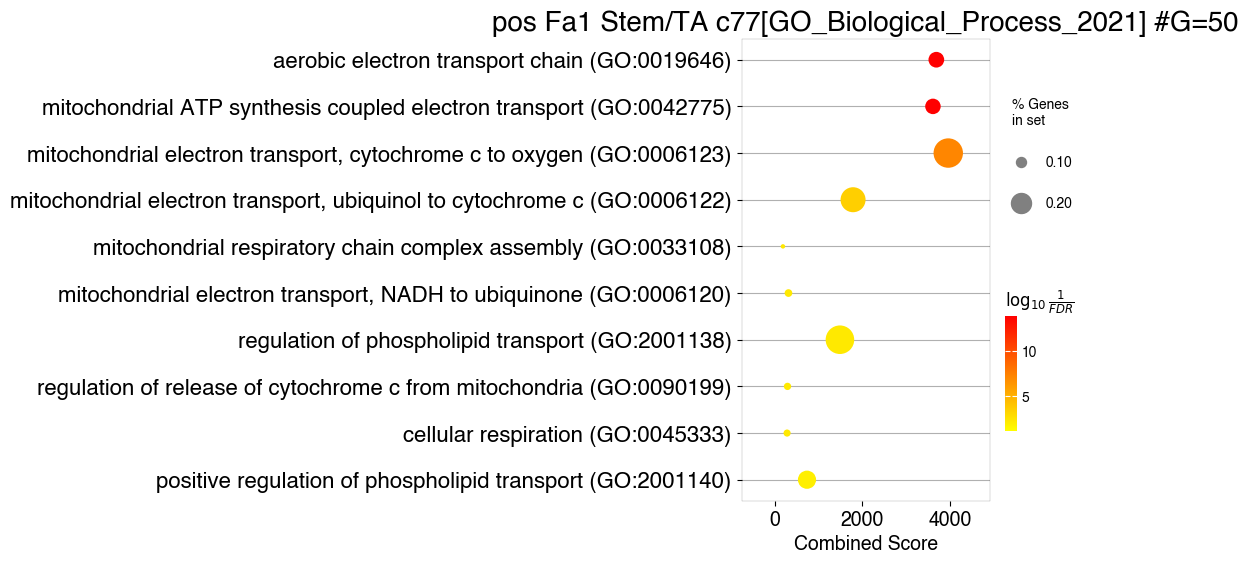

In [34]:
scov.pathway_analysis(all_output_data,choose_celltypes=['Stem/TA'],
NOG_pathway=50,choose_factors_id=[1],
positively_correlated=True,savefigure=False,database=['GO_Biological_Process_2021'])

The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


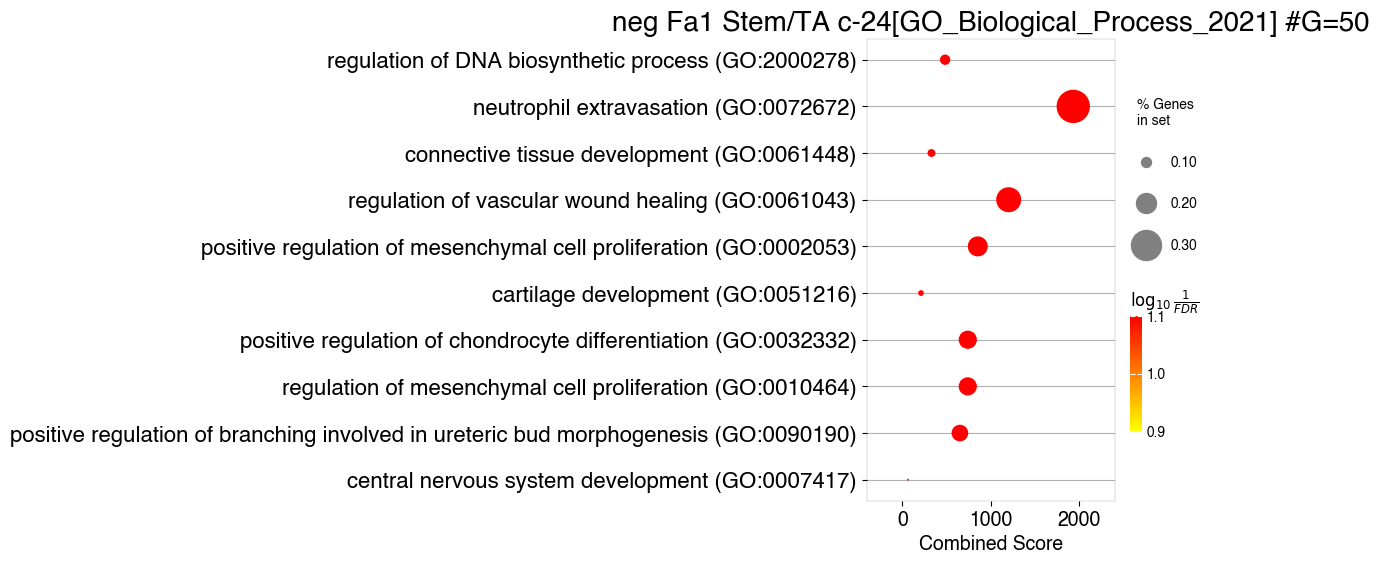

In [35]:
scov.pathway_analysis(all_output_data,choose_celltypes=['Stem/TA'],
NOG_pathway=50,choose_factors_id=[1],
positively_correlated=False,savefigure=False,database=['GO_Biological_Process_2021'])

The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3/Pathway_figures/
cell types found  ['Paneth']


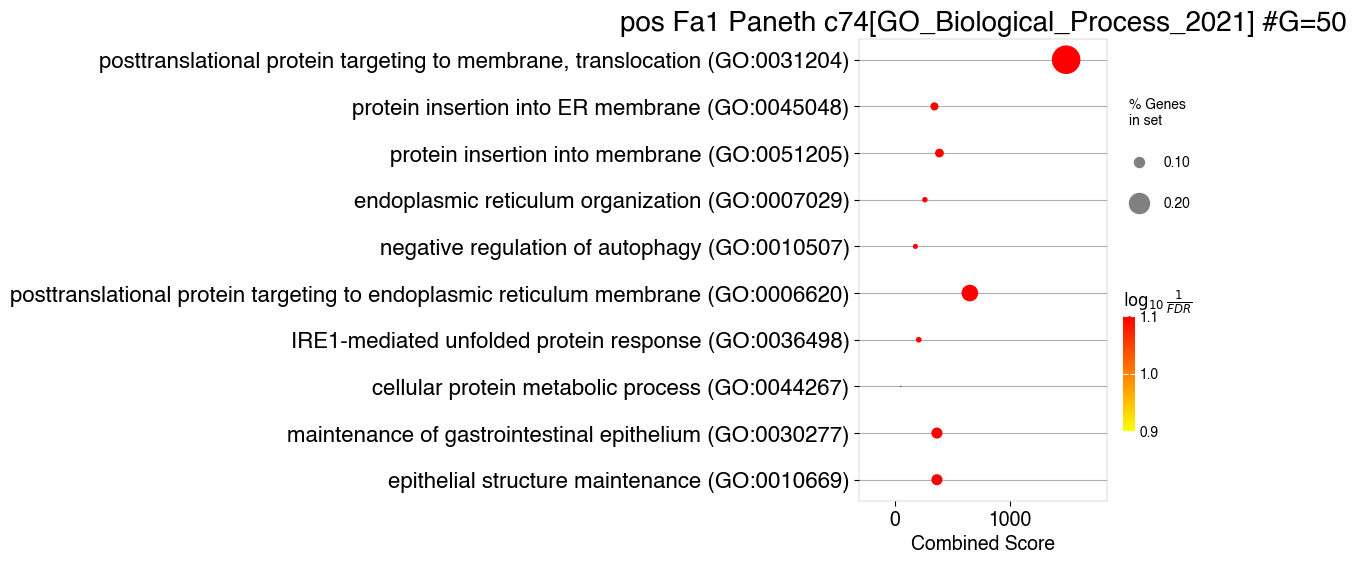

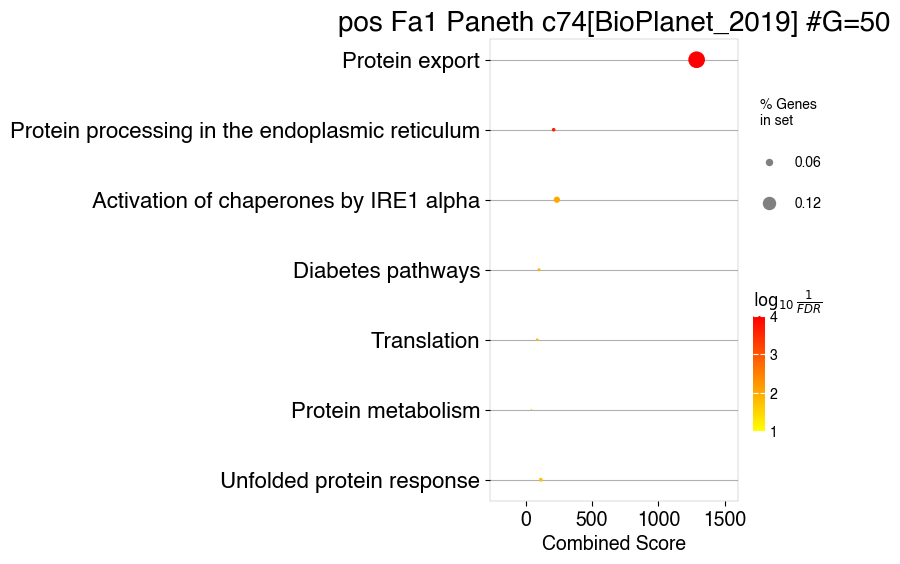

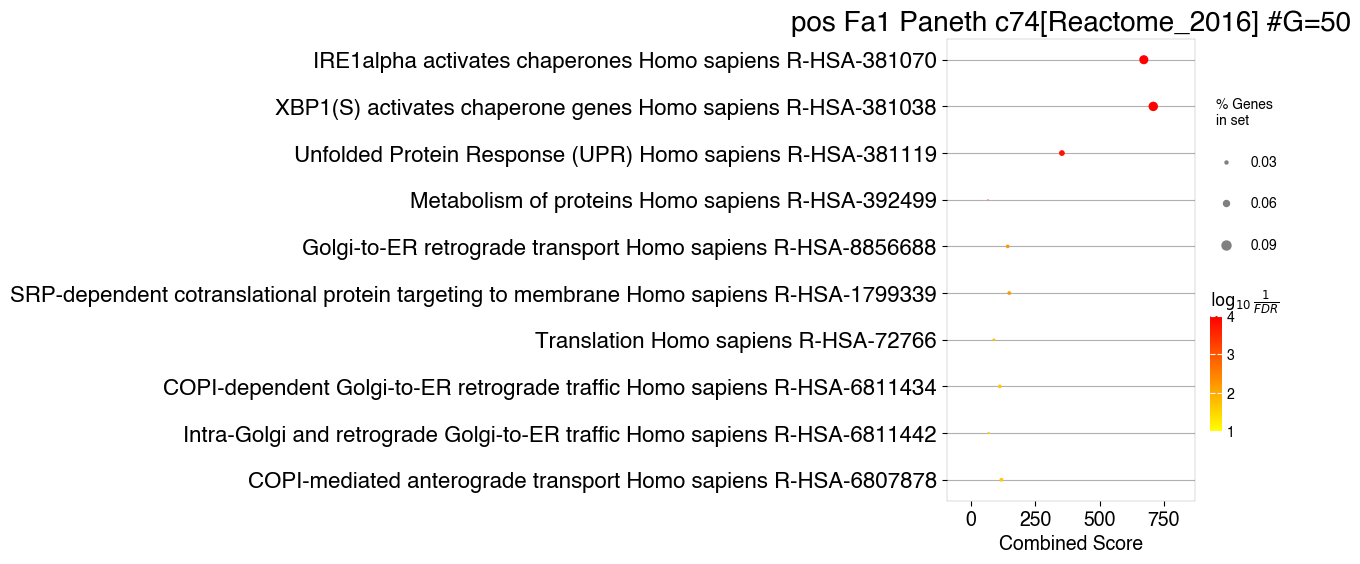

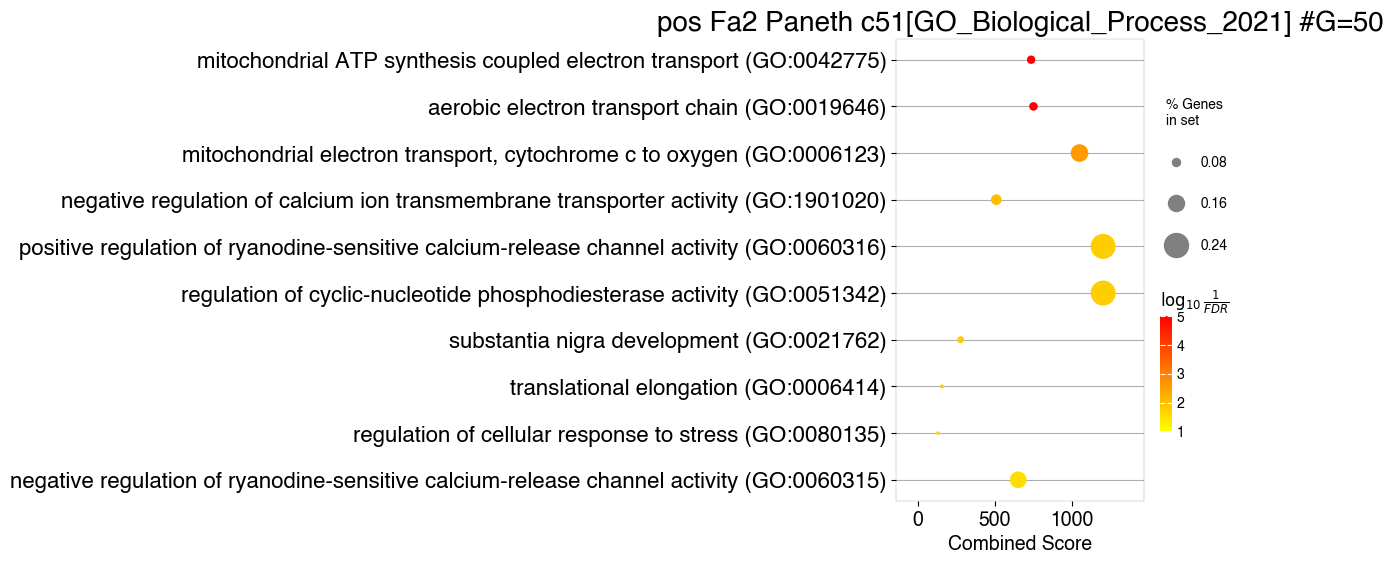

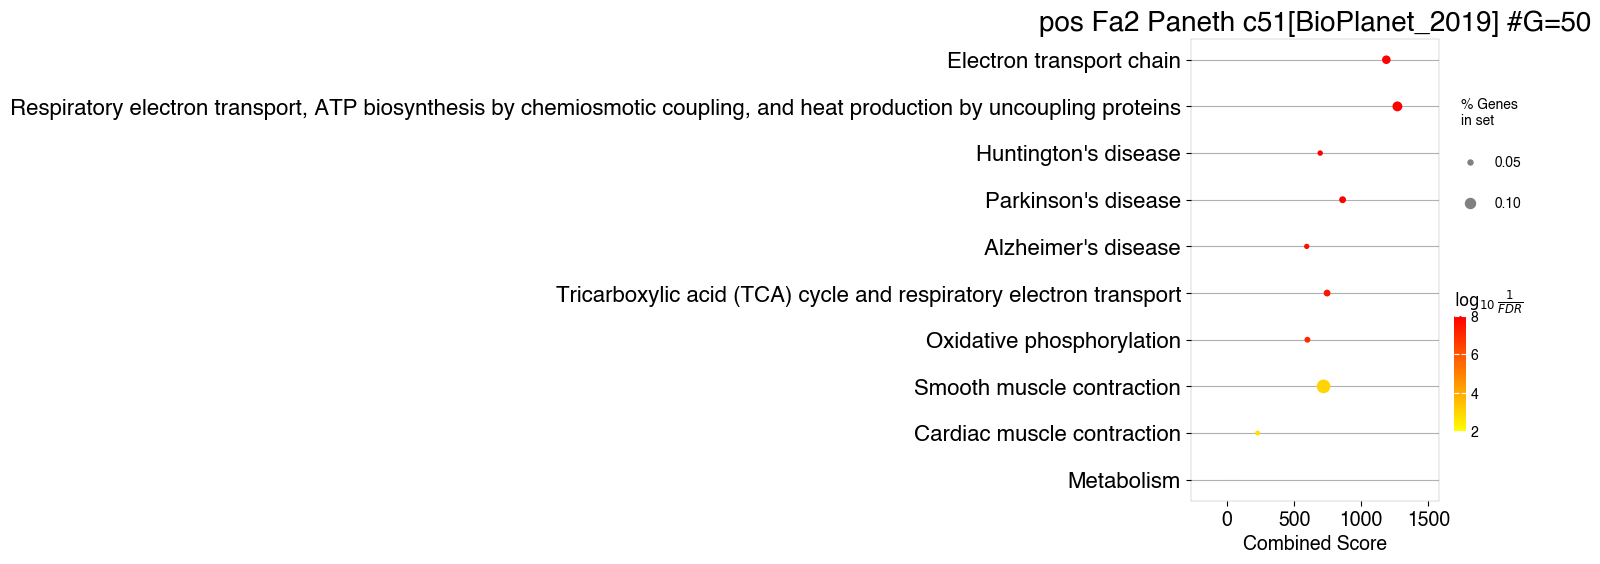

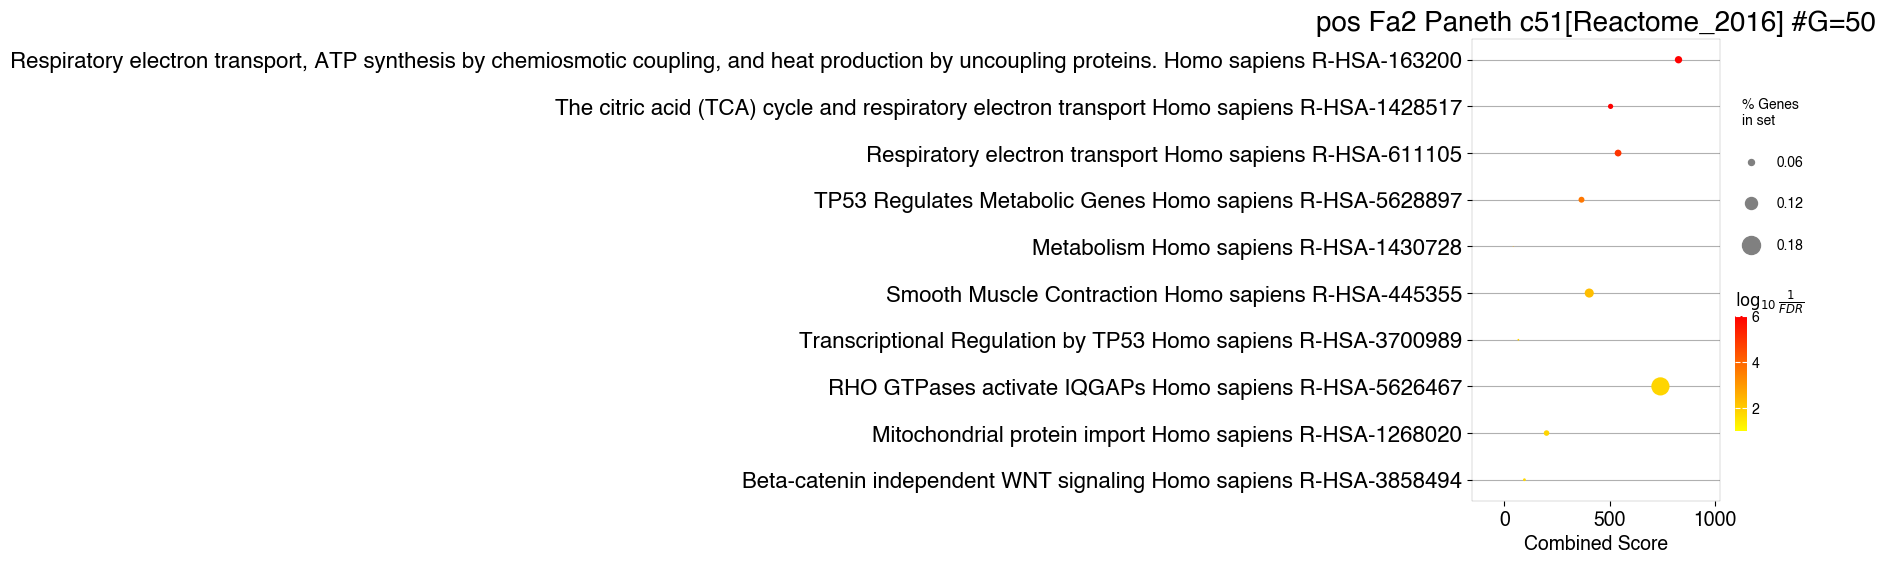

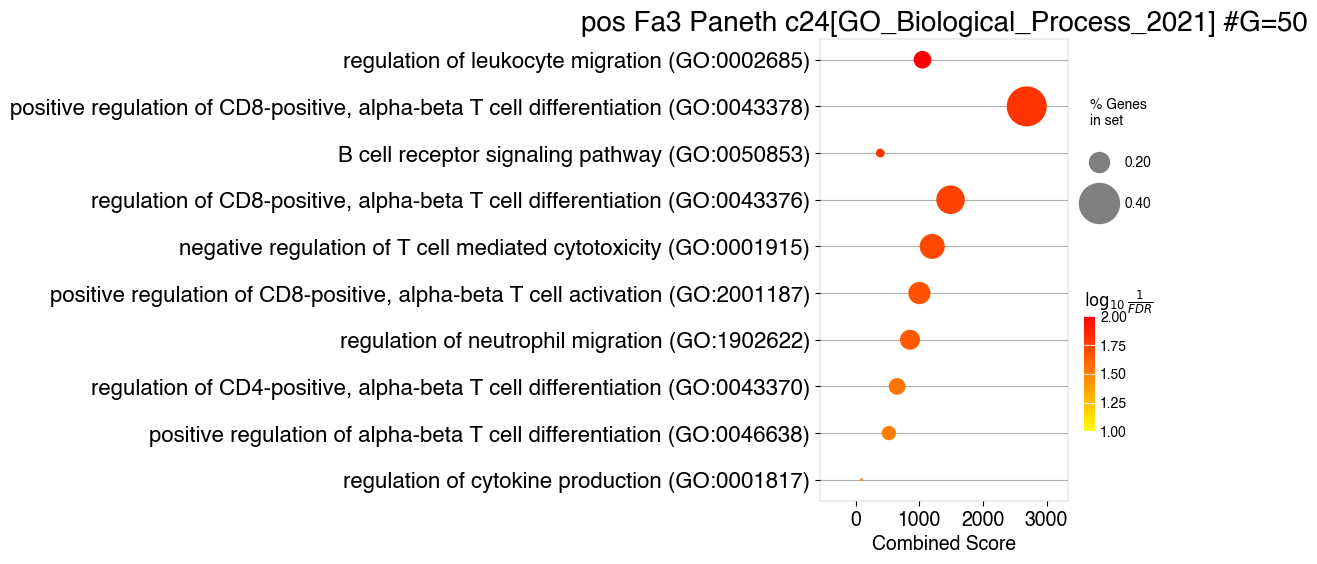

In [41]:
scov.pathway_analysis(all_output_data,choose_celltypes=['Paneth'],
    NOG_pathway=50,choose_factors_id=[],
    positively_correlated=True,savefigure=False,rps_rpl_mt_genes_included=False)


The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3/Pathway_figures/
cell types found  ['Goblet']


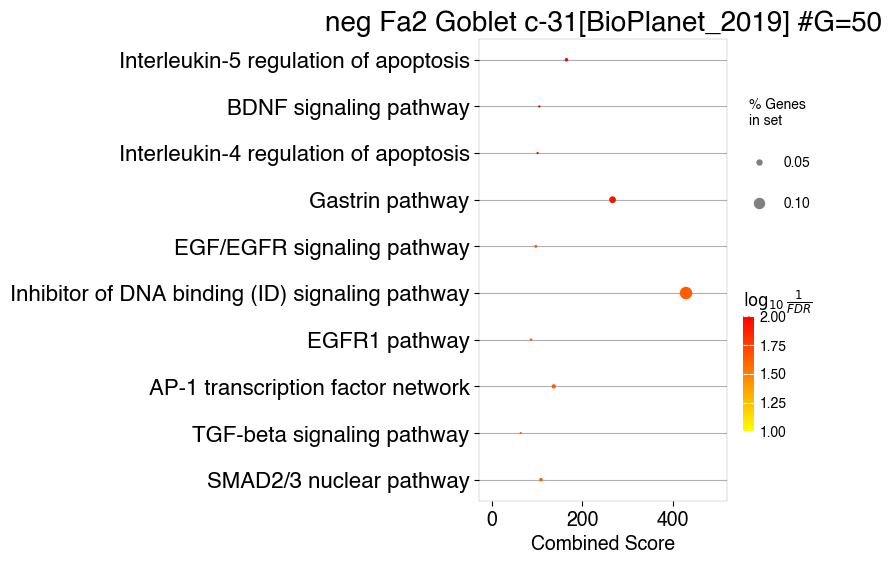

In [42]:
scov.pathway_analysis(all_output_data,choose_celltypes=['Goblet'],NOG_pathway=50,choose_factors_id=[2],
                      positively_correlated=False,savefigure=False,database=['BioPlanet_2019'])

cell types found  ['Paneth']
The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/dotplots/Paneth.png


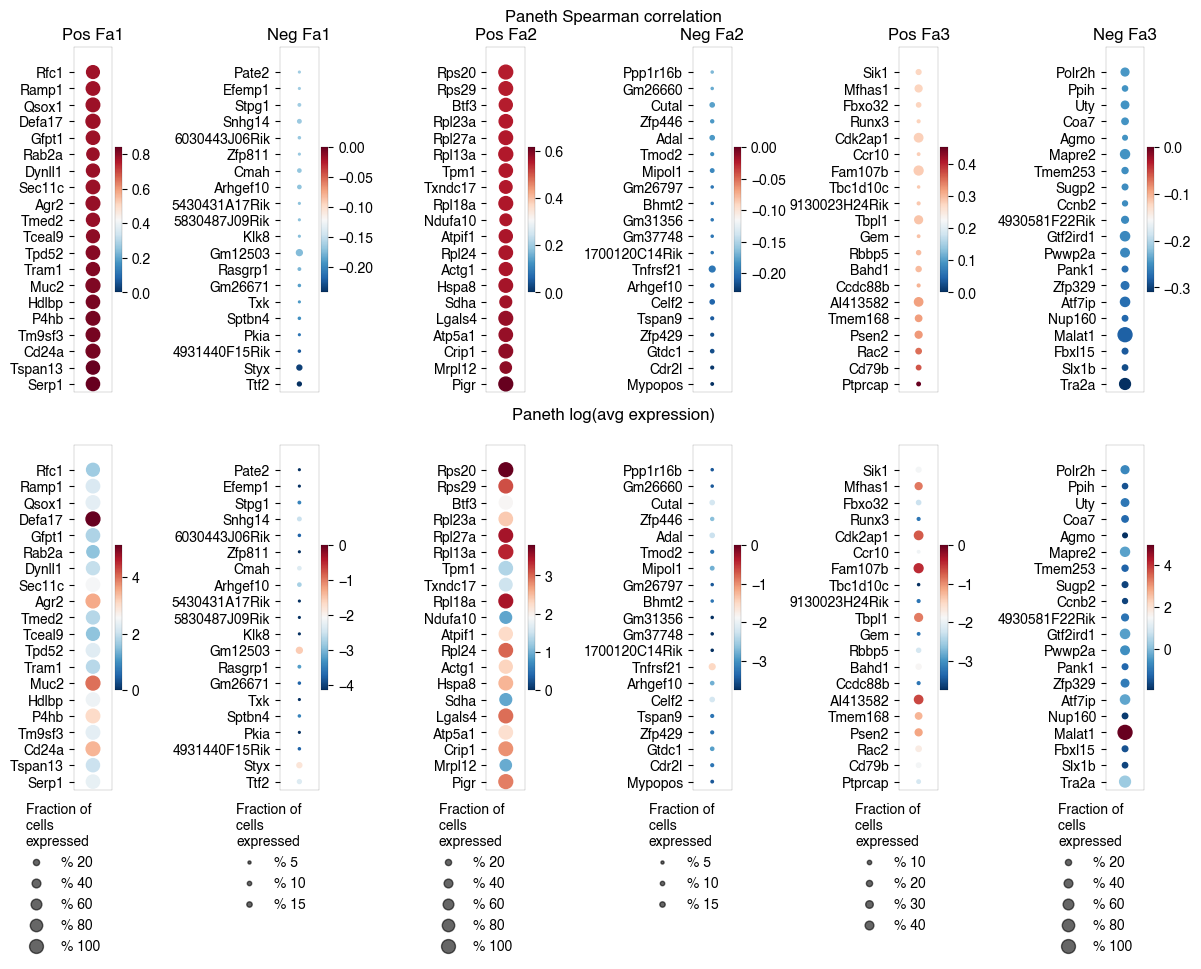

In [43]:
scov.plot_top_selected_genes_for_all_factors_from_chosen_celltype(all_output_data,saveas='png',
                        choose_celltypes=['Paneth'])

# Visualize factor values in the UMAP

The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/scRNAseq_factors_in_umap.png


0

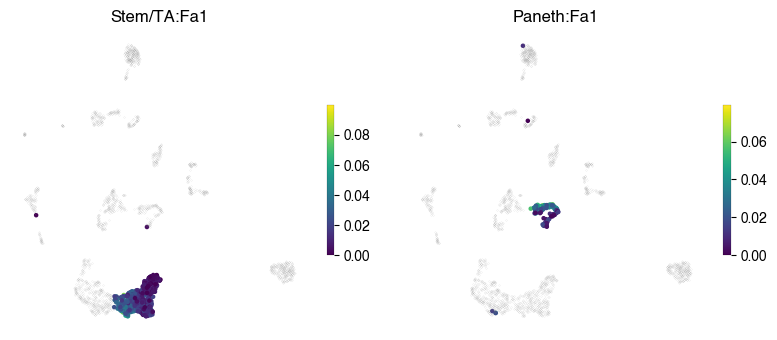

In [24]:
scov.visualize_factors_in_scRNAseq_umap(all_output_data,
        choose_interacting_celltype_pair=['Stem/TA','Paneth'],
                                  saveas='png',      
        visualize_factors_id=[1,1])


The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/spatial_factors_in_umap.png


0

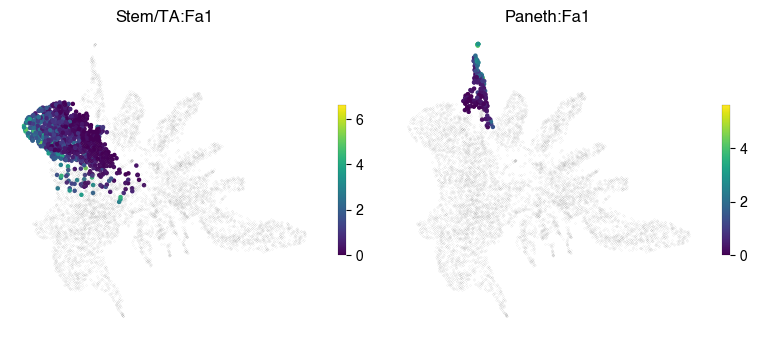

In [25]:
scov.visualize_factors_in_spatial_umap(all_output_data,
                choose_interacting_celltype_pair=['Stem/TA','Paneth'],
                visualize_factors_id=[1,1],
                saveas='png')
